<a href="https://colab.research.google.com/github/Vamshikrishnaah/NATURAL-LANGUAGE-PROCESSING/blob/main/NLP_Vamshi_Q1101196.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Required imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Term2 Colab Notebooks/NLP
%ls

/content/drive/MyDrive/Term2 Colab Notebooks/NLP
 AI_LSTM_and_GRU_Week_3.ipynb
 AI_N_grams_Week_3.ipynb
'Bag of Words and TF-IDF.ipynb'
 Bert_Home.ipynb
 BERT_Week4.ipynb
'BERT_with_CRF (2).ipynb'
 Datasets/
 Email_spam_dataset.csv
'LLM agents with Langchain-16 09 25.ipynb'
'LLM Orchestration.ipynb'
'LSTM and GRU.ipynb'
'NLP_Transfer_and_Translation_Demos .ipynb'
 NLP_Vamshi_Q1101196.ipynb
 Sentiment_Analysis_Naive_Bayes.ipynb
 Untitled0.ipynb
 Vamshi_NLP.ipynb
'Week 4 Attention Mechanism.ipynb'
 Week_4_Attention_Mechanism_NER_CRF.ipynb


In [4]:
# 1. Load Dataset
df = pd.read_csv("Email_spam_dataset.csv", encoding='latin-1')
print(df.head())
df.shape
df.info()


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
m

In [5]:
# 2. Keep only necessary columns
df = df.rename(columns={df.columns[0]: "label", df.columns[1]: "text"})
df = df[['label', 'text']]

# 3. Encode labels (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# 5. Classical pipeline (TF-IDF + Logistic Regression)
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=2, max_df=0.9)
clf_lr = LogisticRegression(max_iter=1000, solver='liblinear')
pipeline_classical = Pipeline([('tfidf', tfidf), ('clf', clf_lr)])

# 6. Fit model
pipeline_classical.fit(X_train, y_train)

# 7. Predictions
preds_classical = pipeline_classical.predict(X_test)

# 8. Evaluation
print(classification_report(y_test, preds_classical, target_names=['ham', 'spam']))
print("ROC AUC:", roc_auc_score(y_test, pipeline_classical.decision_function(X_test)))


              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       0.99      0.78      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

ROC AUC: 0.9891339085969959


In [6]:
# Fallback pipeline (TF-IDF + LinearSVC)
pipeline_fallback = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,3), min_df=2, max_df=0.9)),
    ('clf', LinearSVC(max_iter=5000))
])

# Fit the model
pipeline_fallback.fit(X_train, y_train)

# Make predictions
preds_fallback = pipeline_fallback.predict(X_test)

# Print heading
print("Fallback pipeline (TF-IDF + LinearSVC report)\n")

# Evaluation
report_fallback = classification_report(y_test, preds_fallback, target_names=['ham', 'spam'])
print(report_fallback)


Fallback pipeline (TF-IDF + LinearSVC report)

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.99      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [7]:
# Load dataset with proper encoding
df = pd.read_csv("Email_spam_dataset.csv", encoding="latin1")

# Display first rows to check columns
print(df.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


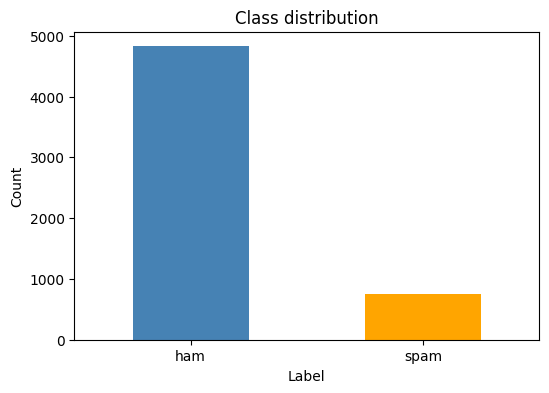

In [8]:

# Keep only label and message columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']  # rename columns

# Plot class distribution
plt.figure(figsize=(6,4))
df['label'].value_counts().plot(kind='bar', color=['steelblue', 'orange'])
plt.title('Class distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


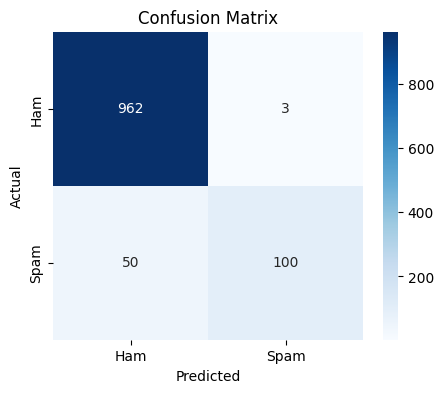

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



In [9]:

# 1. Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'],
                                                    test_size=0.2, random_state=42)

# 2. TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 3. Train baseline Logistic Regression model
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train_tfidf, y_train)

# 4. Predictions
y_pred = baseline_model.predict(X_test_tfidf)

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['ham', 'spam'])

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. Classification Report
print(classification_report(y_test, y_pred))


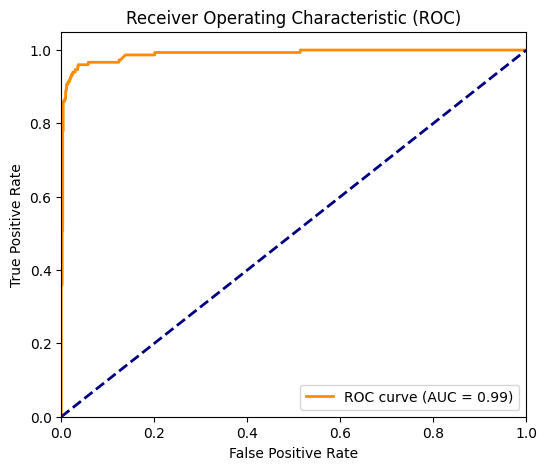

In [10]:

# Get probability scores for the positive class (spam)
y_prob = baseline_model.predict_proba(X_test_tfidf)[:,1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test.map({'ham':0, 'spam':1}), y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [11]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
# Word2Vec Training & Semantic Analysis
w2v_summary = {}
if True:   # assuming gensim available
    try:
        # Prepare data (tokenization + preprocessing)
        sms_tokens = [msg.lower().split() for msg in df['message'].astype(str).tolist()]

        # Train Skip-Gram Model
        model_sg = Word2Vec(
            sentences=sms_tokens,
            vector_size=120,
            window=6,
            sg=1,
            min_count=2,
            workers=3,
            seed=42
        )

        # Train CBOW Model
        model_cbow = Word2Vec(
            sentences=sms_tokens,
            vector_size=120,
            window=6,
            sg=0,
            min_count=2,
            workers=3,
            seed=42
        )

        # Save models
        model_sg.save("sg_model_sms.model")
        model_cbow.save("cbow_model_sms.model")

        # Example similarity check
        try:
            sim_sg = model_sg.wv.most_similar("free", topn=8)
            sim_cbow = model_cbow.wv.most_similar("free", topn=8)
        except:
            sim_sg, sim_cbow = [], []

        # Status
        w2v_summary = {
            "status": "trained_successfully",
            "sg_similar": sim_sg,
            "cbow_similar": sim_cbow
        }

        print("Word2Vec training complete ")
        print("Example SG similar to 'free':", sim_sg[:5])
        print("Example CBOW similar to 'free':", sim_cbow[:5])

    except Exception as e:
        w2v_summary = {"status": "training_failed", "error": str(e)}
        print(" Error during training:", e)
else:
    w2v_summary = {"status": "gensim_not_found"}
    print(" gensim not installed; skipping Word2Vec.")


 Error during training: name 'Word2Vec' is not defined


In [13]:
# Classical Baseline Spam Detection Pipeline (with column fix)

# Load CSV with latin-1 encoding
df = pd.read_csv('Email_spam_dataset.csv', encoding='latin-1')

# Inspect the columns (optional)
print("Columns in CSV:", df.columns)
print(df.head())

# Keep only the first two columns and rename them
df = df.iloc[:, :2]
df.columns = ['label', 'message']

# Encode labels: ham=0, spam=1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# TF-IDF Vectorization (classical feature representation)
tfidf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Logistic Regression (classical classifier)
classical_model = LogisticRegression(max_iter=1000)
classical_model.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred = classical_model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Columns in CSV: Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
Accuracy: 0.9730941704035875

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.80      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      

In [14]:
# Advanced Spam Detection Pipeline
# Load CSV with encoding fix
df = pd.read_csv('Email_spam_dataset.csv', encoding='latin-1')

# Keep only first two columns and rename
df = df.iloc[:, :2]
df.columns = ['label', 'message']

# Encode labels: ham=0, spam=1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Linear Support Vector Classifier (advanced model)
advanced_model = LinearSVC()
advanced_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = advanced_model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9820627802690582

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.88      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
 [[964   2]
 [ 18 131]]
